<a href="https://colab.research.google.com/github/sulaiman01626/My-python-practice-/blob/main/sales_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Sales Data Analysis Report

This project explores sales trends using visualizations. The dataset includes sales data across products, regions, and time.

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Step 2: Upload the CSV file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"✅ File Uploaded: {file_name}")

Saving sales_data.csv (1) to sales_data (3).csv (1)
✅ File Uploaded: sales_data (3).csv (1)


In [10]:
# Step 3: Load the data into a pandas DataFrame
try:
    df = pd.read_csv(file_name)
    print("📋 First 5 rows of the data:")
    display(df.head())
    print("\nℹ️ Data Info:")
    df.info()
except Exception as e:
    print("❌ Error loading file:", e)

📋 First 5 rows of the data:


,Date,Product,Region,Sales,Quantity
0,2023-01-01,Laptop,East,1200,2
1,2023-01-01,Mouse,East,25,5
2,2023-01-02,Keyboard,West,75,3
3,2023-01-02,Monitor,North,300,1
4,2023-01-03,Laptop,South,1100,2



ℹ️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      24 non-null     object
 1   Product   24 non-null     object
 2   Region    24 non-null     object
 3   Sales     24 non-null     int64 
 4   Quantity  24 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [11]:
# Step 4: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Check for missing values
print("\n🧼 Null values per column:\n", df.isnull().sum())


🧼 Null values per column:
 Date        0
Product     0
Region      0
Sales       0
Quantity    0
dtype: int64


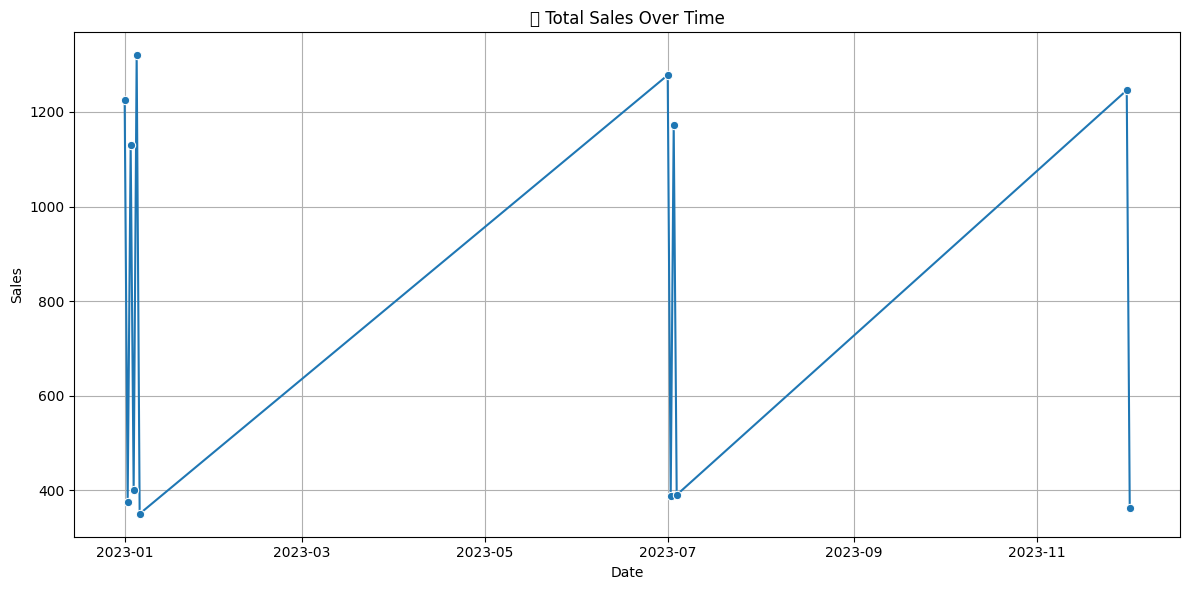

In [12]:
# Step 6: Line chart for total sales over time
plt.figure(figsize=(12,6))
sales_over_time = df.groupby('Date')['Sales'].sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=sales_over_time, marker='o')
plt.title('📅 Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

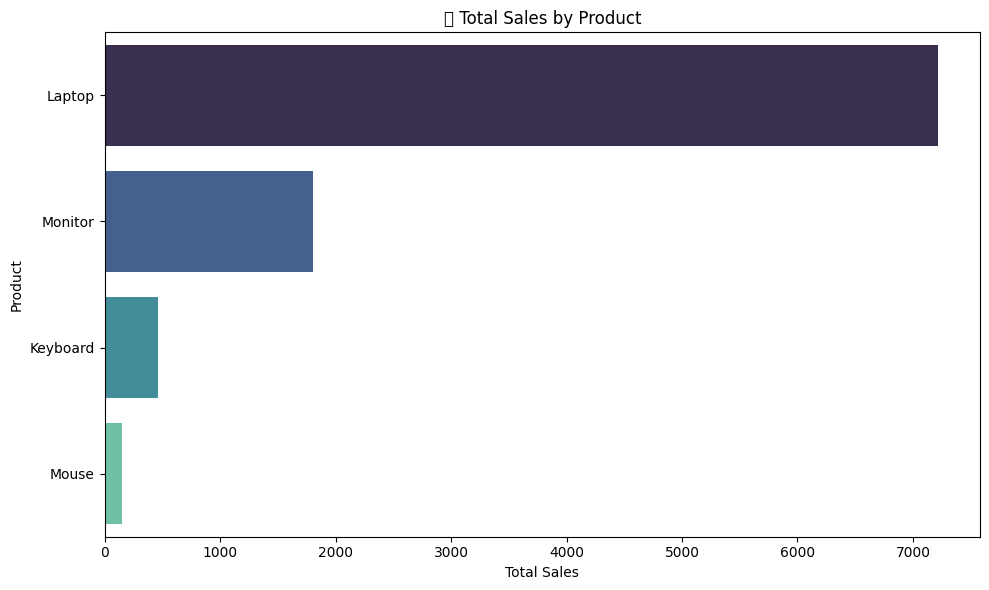

In [13]:
# Step 7: Bar chart showing total sales for each product
plt.figure(figsize=(10,6))
product_sales = df.groupby('Product')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Sales', y='Product', data=product_sales, palette='mako')
plt.title('🏆 Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

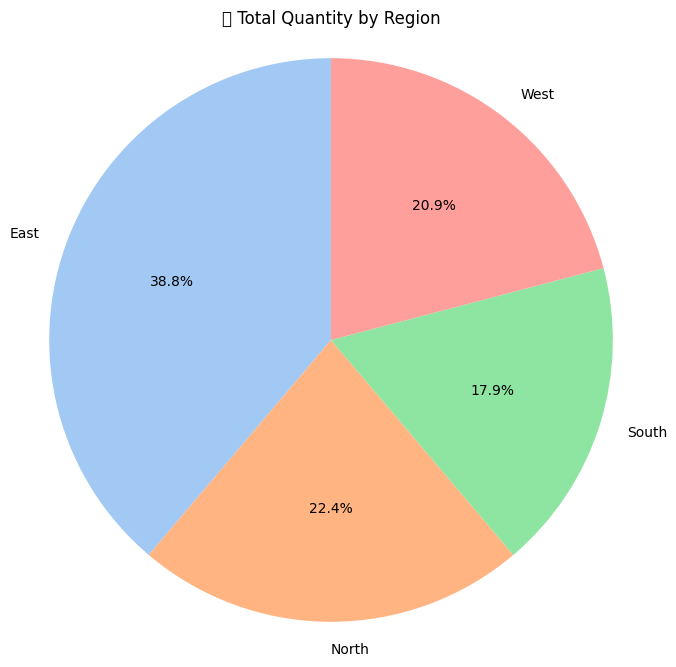

In [14]:
# Step 8: Pie chart showing quantity sold by region
plt.figure(figsize=(8,8))
region_qty = df.groupby('Region')['Quantity'].sum().reset_index()
plt.pie(region_qty['Quantity'], labels=region_qty['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('🗺️ Total Quantity by Region')
plt.axis('equal')
plt.show()

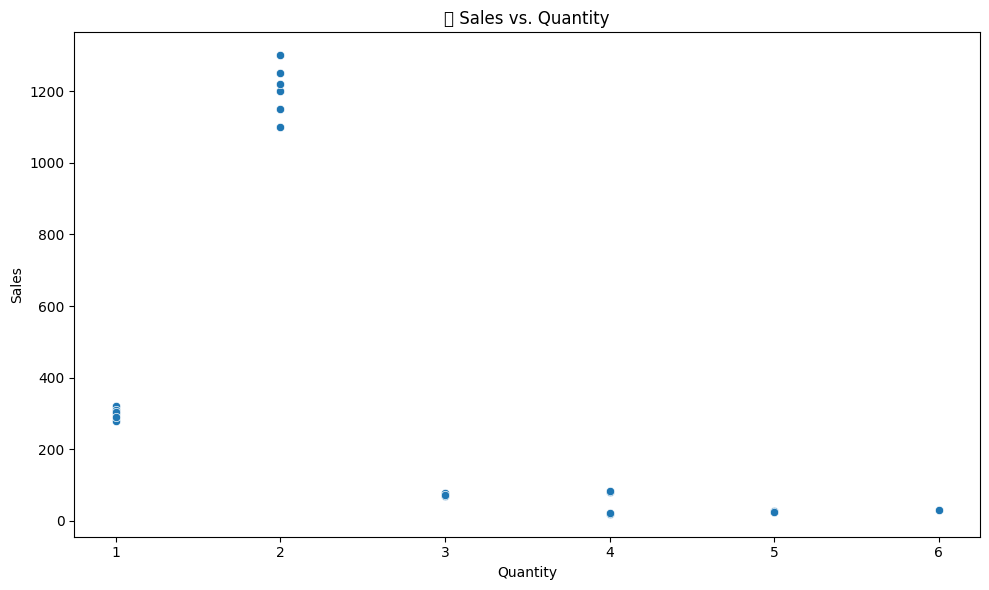

In [15]:
# Step 9: Scatter plot to explore relationship between Quantity and Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title('📉 Sales vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

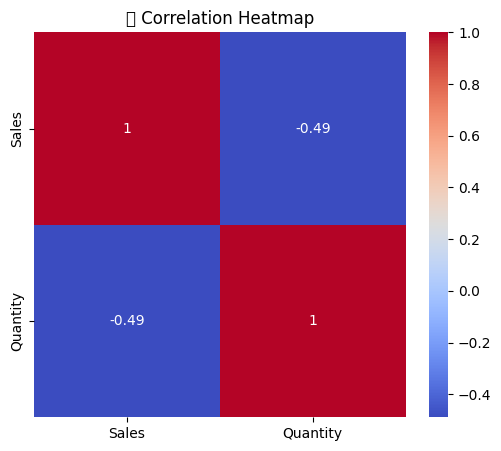

In [16]:
# Step 10: Heatmap to show correlation between numeric fields
plt.figure(figsize=(6,5))
sns.heatmap(df[['Sales', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('📊 Correlation Heatmap')
plt.show()

In [19]:
# Final step: Print completion message
print("✅ Analysis Complete! Thanks 👍")

✅ Analysis Complete! Thanks 👍
